# Exercise Chapter 2 
Industrial Statistics: A Computer Based Approach with Python<br>
by Ron Kenett, Shelemyahu Zacks, Peter Gedeck

Publisher: Springer International Publishing; 1st edition (2023) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2022 Ron Kenett, Shelemyahu Zacks, Peter Gedeck

The code needs to be executed in sequence.

In [1]:
import os
os.environ['OUTDATED_IGNORE'] = '1'
import warnings
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)

In [2]:
import numpy as np
import pandas as pd
import pingouin as pg
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as sms
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns
import matplotlib.pyplot as plt
import pwlf

import mistat

# Exercise 1

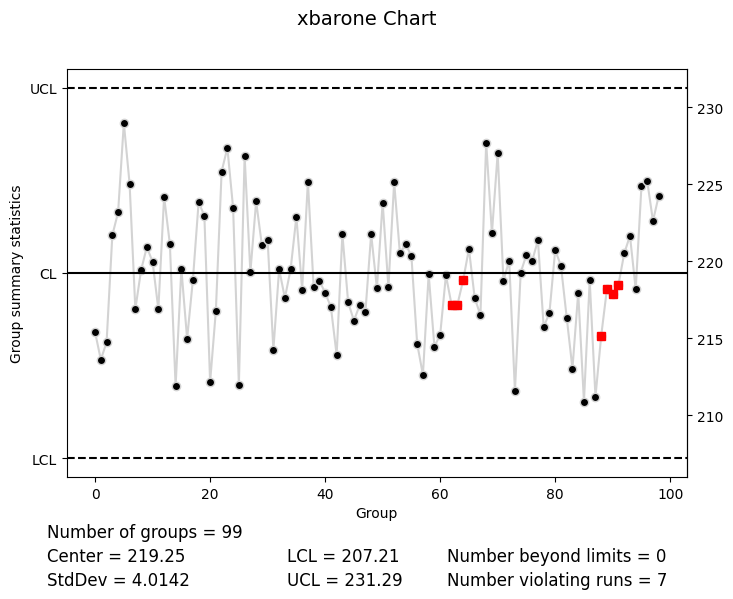

In [3]:
oelect = mistat.load_data('OELECT')
qcc = mistat.QualityControlChart(oelect, qcc_type='xbarone',
                                 std_dev='SD')
qcc.plot()
plt.show()

# Exercise 2

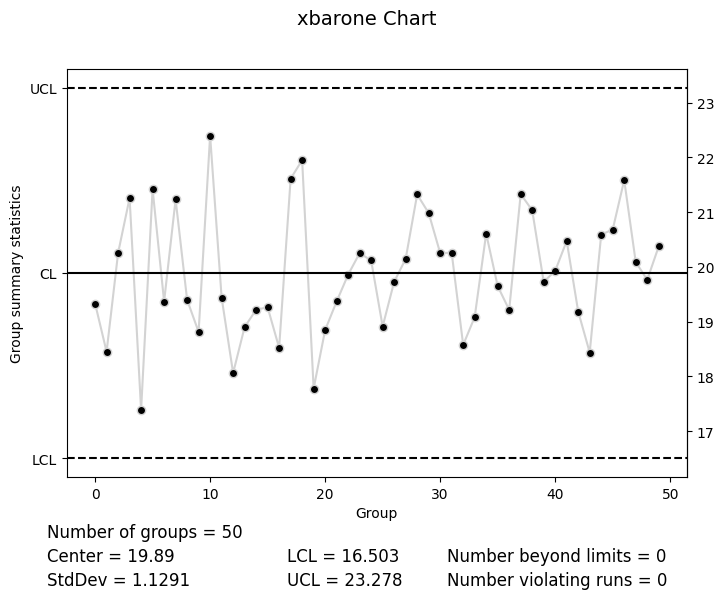

In [4]:
steelrod = mistat.load_data('STEELROD')
qcc = mistat.QualityControlChart(steelrod, qcc_type='xbarone',
                                 std_dev='SD')
qcc.plot()
plt.show()

# Exercise 4

0.07199111056234651 0.6526


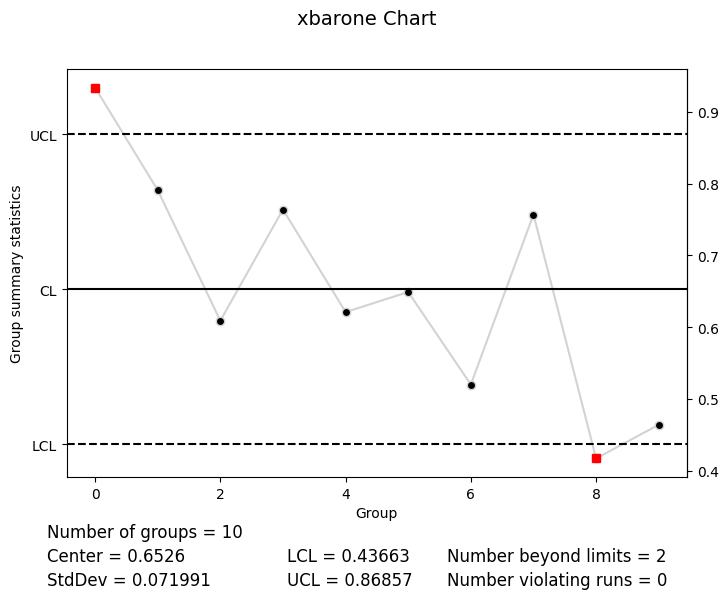

In [5]:
oturb2 = mistat.load_data('OTURB2')
# print(oturb2)
sd = np.sqrt(oturb2['xbar'].var() / 5)
center = oturb2['xbar'].mean()
print(sd, center)
qcc = mistat.QualityControlChart(oturb2['xbar'], qcc_type='xbarone',
        center=center, std_dev=sd)
qcc.plot()
plt.show()

# Exercise 6

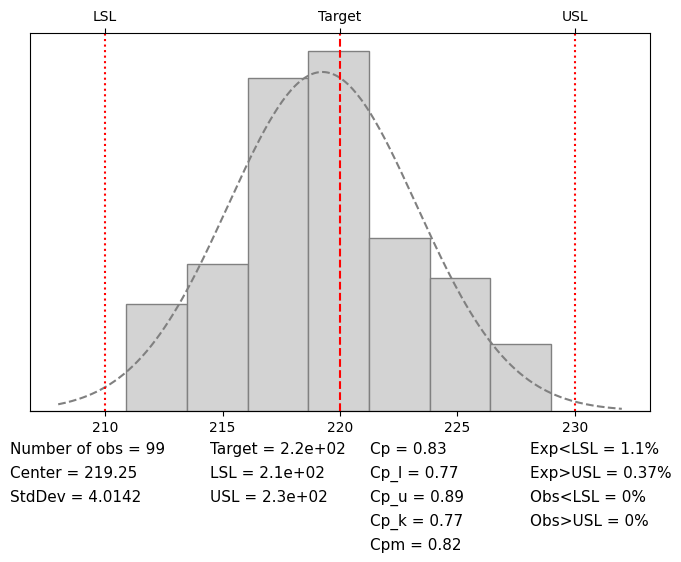

Process Capability Analysis

Number of obs = 99           Target = 220.00
       Center = 219.25          LSL = 210.00
       StdDev = 4.014219        USL = 230.00

Capability indices:

        Value     2.5%   97.5%
Cp      0.8304  0.7142  0.9463
Cp_l    0.7679  0.6622  0.8737
Cp_u    0.8928  0.7743  1.0113
Cp_k    0.7679  0.6420  0.8939
Cpm     0.8162  0.7007  0.9315

Exp<LSL   1%   Obs<LSL   0%
Exp>USL   0%   Obs>USL   0%


In [6]:
oelect = mistat.load_data('OELECT')

qcc = mistat.QualityControlChart(oelect, qcc_type='xbarone',
                                 std_dev='SD')
pc = mistat.ProcessCapability(qcc, spec_limits = [210, 230])
pc.plot()
plt.show()
pc.summary()

# Exercise 7

In [7]:
oelect = mistat.load_data('OELECT')
qcc = mistat.QualityControlChart(oelect, qcc_type='xbarone',
    std_dev=4.004, center=219.25)
pc = mistat.ProcessCapability(qcc, spec_limits = [210, 230],
                              confidence_level=0.975)
pc.summary()
pc = mistat.ProcessCapability(qcc, spec_limits = [210, 230],
                              confidence_level=0.95)
pc.summary()

Process Capability Analysis

Number of obs = 99           Target = 220.00
       Center = 219.25          LSL = 210.00
       StdDev = 4.004000        USL = 230.00

Capability indices:

        Value     2.5%   97.5%
Cp      0.8325  0.7002  0.9663
Cp_l    0.7701  0.6438  0.8963
Cp_u    0.8949  0.7535  1.0364
Cp_k    0.7701  0.6257  0.9144
Cpm     0.8183  0.6868  0.9513

Exp<LSL   1%   Obs<LSL   0%
Exp>USL   0%   Obs>USL   0%
Process Capability Analysis

Number of obs = 99           Target = 220.00
       Center = 219.25          LSL = 210.00
       StdDev = 4.004000        USL = 230.00

Capability indices:

        Value     2.5%   97.5%
Cp      0.8325  0.7161  0.9488
Cp_l    0.7701  0.6641  0.8760
Cp_u    0.8949  0.7762  1.0136
Cp_k    0.7701  0.6438  0.8963
Cpm     0.8183  0.7025  0.9339

Exp<LSL   1%   Obs<LSL   0%
Exp>USL   0%   Obs>USL   0%


In [8]:
def confidenceLimitSL(Cp, n, alpha):
    F = stats.f(1, n-1).ppf(1-(1-alpha)/2)
    a = np.sqrt(F/n) * np.sqrt(Cp**2/2 + (1 - F/(2*n))/9)
    b = 1 - F/(2*n)
    return (Cp - a) / b, (Cp + a )/ b

n = len(oelect)
rho_1L, rho_1U = confidenceLimitSL(pc.Cp_l, n, 0.95)
rho_2L, rho_2U = confidenceLimitSL(pc.Cp_u, n, 0.95)
print(rho_1L, rho_1U)
print(rho_2L, rho_2U)

0.6413037077789147 0.9402124117777945
0.7514350333838329 1.0865431596145048


# Exercise 8

In [9]:
steelrod = mistat.load_data('STEELROD')
qcc = mistat.QualityControlChart(steelrod, qcc_type='xbarone',
                                 std_dev='SD')
pc = mistat.ProcessCapability(qcc, spec_limits = [19, 21],
                              confidence_level=0.95)
pc.summary()

Process Capability Analysis

Number of obs = 50           Target = 20.00
       Center = 19.89           LSL = 19.00
       StdDev = 1.129109        USL = 21.00

Capability indices:

        Value     2.5%   97.5%
Cp      0.2952  0.2369  0.3534
Cp_l    0.2628  0.1738  0.3518
Cp_u    0.3276  0.2329  0.4224
Cp_k    0.2628  0.1568  0.3688
Cpm     0.2938  0.2361  0.3514

Exp<LSL  22%   Obs<LSL  22%
Exp>USL  16%   Obs>USL  20%


In [10]:
n = len(steelrod)
rho_1L, rho_1U = confidenceLimitSL(pc.Cp_l, n, 0.95)
rho_2L, rho_2U = confidenceLimitSL(pc.Cp_u, n, 0.95)
print(rho_1L, pc.Cp_l, rho_1U)
print(rho_2L, pc.Cp_u, rho_2U)

0.14851207708654524 0.26280004915567645 0.40677992256113854
0.2084480020651775 0.32763581095436156 0.4838408510212421


# Exercise 9

In [11]:
settings = {'m': 30, 's': 0.005, 'k': 1000, 't': 290, 
            'p0': 90_000, 'v0': 0.002, 't0': 340}

simulator = mistat.PistonSimulator(n_simulation=20, n_replicate=1, seed=1, 
                                   **settings)
Ps = simulator.simulate()
cycleTime = mistat.qcc_groups(Ps['seconds'], Ps['group'])

qcc = mistat.QualityControlChart(cycleTime, std_dev= Ps['seconds'].std())
print(f'Mean    {qcc.center:.4f}')
print(f'Std.Dev {qcc.std_dev:.4f}')

Mean    0.0257
Std.Dev 0.0078


In [12]:
pc = mistat.ProcessCapability(qcc, spec_limits = [0.04, 0.06],
                              confidence_level=0.95)
print(f'C_p {pc.Cp:.3f}')

C_p 0.425


In [13]:
settings = {'m': 60, 's': 0.02, 'k': 5_000, 't': 296, 
            'p0': 110_000, 'v0': 0.01, 't0': 360}

simulator = mistat.PistonSimulator(n_simulation=20, n_replicate=1, seed=1, **settings)
Ps = simulator.simulate()
cycleTime = mistat.qcc_groups(Ps['seconds'], Ps['group'])
qcc = mistat.QualityControlChart(cycleTime, std_dev= Ps['seconds'].std())
print(f'Mean    {qcc.center:.4f}')
print(f'Std.Dev {qcc.std_dev:.4f}')

Mean    0.0568
Std.Dev 0.0037


In [14]:
pc = mistat.ProcessCapability(qcc, spec_limits = [0.04, 0.06],
                              confidence_level=0.95)
pc.summary()

Process Capability Analysis

Number of obs = 20           Target = 0.05
       Center = 0.06            LSL = 0.04
       StdDev = 0.003720        USL = 0.06

Capability indices:

        Value     2.5%   97.5%
Cp      0.8960  0.6135  1.1782
Cp_l    1.5090  1.0881  1.9298
Cp_u    0.2830  0.1390  0.4270
Cp_k    0.2830  0.1115  0.4546
Cpm     0.4281  0.2543  0.6020

Exp<LSL   0%   Obs<LSL   0%
Exp>USL  20%   Obs>USL  10%


# Exercise 12

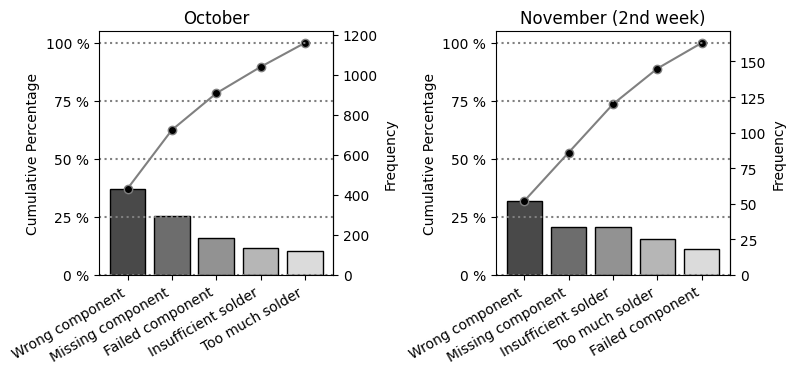

In [15]:
october = pd.DataFrame([
  ['Missing component', 293],
  ['Wrong component', 431],
  ['Too much solder', 120],
  ['Insufficient solder', 132],
  ['Failed component', 183],
], columns=['Issue', 'Count'])
november = pd.DataFrame([
  ['Missing component', 34],
  ['Wrong component', 52],
  ['Too much solder', 25],
  ['Insufficient solder', 34],
  ['Failed component', 18],
], columns=['Issue', 'Count'])

def makeParetoChart(data, ax, title):
  paretoChart = mistat.ParetoChart(data['Count'], labels=data['Issue'])
  paretoChart.plot(rotation=30, ha='right', ax=ax)
  ax.set_title(title)

fig, axes = plt.subplots(ncols=2, figsize=(8,4))
makeParetoChart(october, axes[0], 'October')
makeParetoChart(november, axes[1], 'November (2nd week)')
fig.suptitle('')
plt.tight_layout()
plt.show()

# Exercise 14

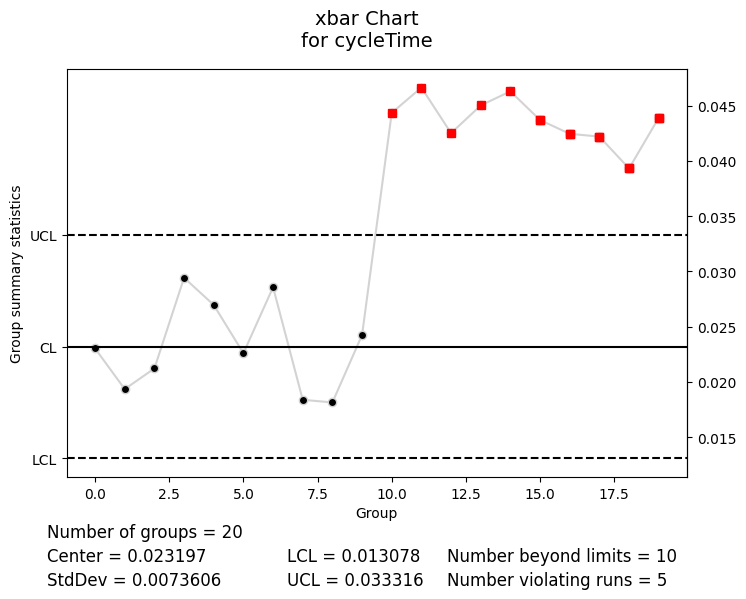

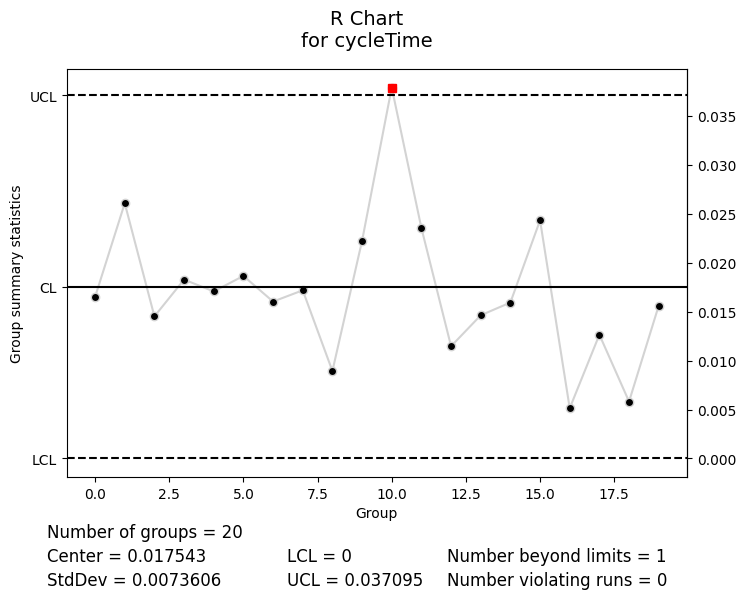

In [16]:
settings = {'m': 30, 's': 0.005, 'v0': 0.002, 'k': 1000,
            'p0': 90_000, 't': 290, 't0': 340}

simulator = mistat.PistonSimulator(n_simulation=20, n_replicate=5, seed=1, **settings)
Ps = simulator.simulate()

# Add 0.02 seconds to last 50 simulation results
Ps.loc[50:,'seconds'] = Ps.loc[50:,'seconds'] + 0.02

def makeQCCplot(data, reference, qcc_type, title):
  # convert to groups
  data = mistat.qcc_groups(data['seconds'], data['group'])
  reference = mistat.qcc_groups(reference['seconds'], reference['group'])
  # calculate control limits based on reference data
  qcc_ref = mistat.QualityControlChart(reference, qcc_type=qcc_type)
  qcc = mistat.QualityControlChart(data, qcc_type=qcc_type,
    center=qcc_ref.center, limits=qcc_ref.limits)
  return qcc.plot(title=title) 

# create xbar and R control charts
reference = Ps.iloc[:50, ]

makeQCCplot(Ps, reference, 'xbar', 'for cycleTime')
plt.show()
makeQCCplot(Ps, reference, 'R', 'for cycleTime')
plt.show()

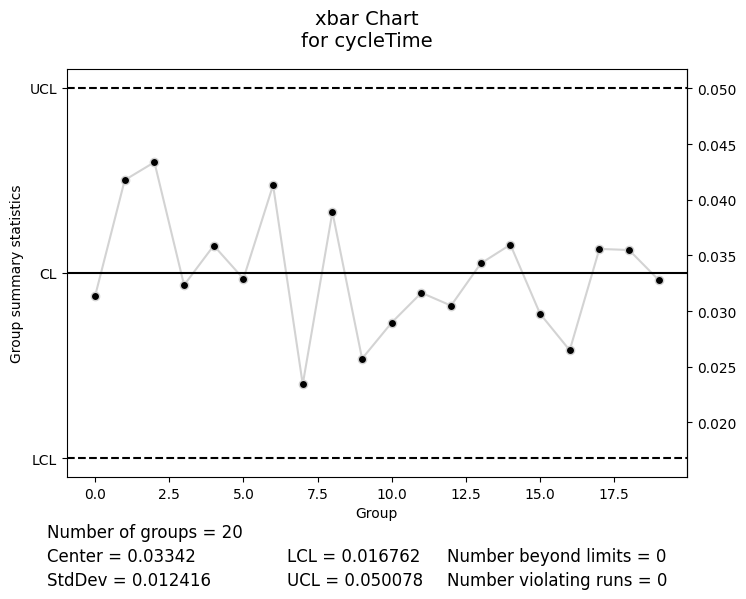

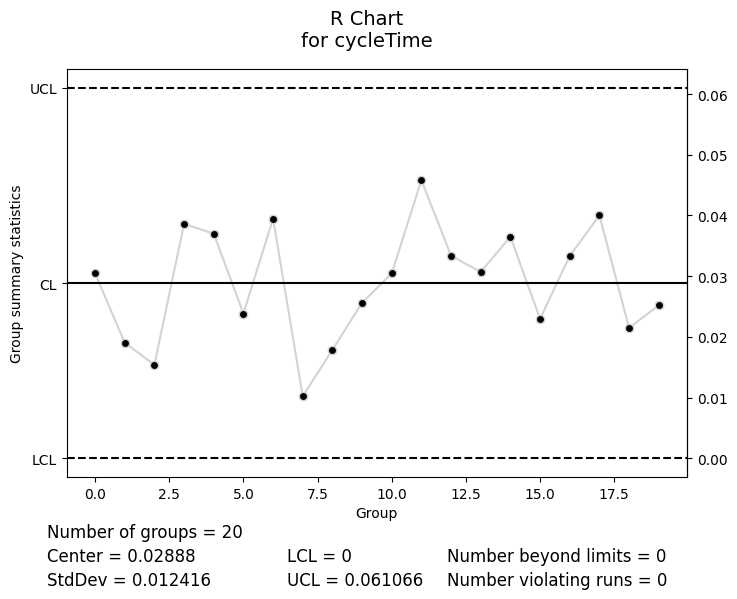

In [17]:
# Create random numbers from U(0,1)
R = stats.uniform.rvs(size=100)

# sort cycle times using by the order of the random numbers 
# this randomizes the cycle times 
Ps['seconds'] = Ps['seconds'][R.argsort()].values
# alternative versions
# Ps['seconds'] = Ps['seconds'].sample(frac=1).values
# Ps['seconds'] = [s for _, s in sorted(zip(R, Ps['seconds']))]

makeQCCplot(Ps, Ps, 'xbar', 'for cycleTime')
plt.show()
makeQCCplot(Ps, Ps, 'R', 'for cycleTime')
plt.show()

# Exercise 15

In [18]:
settings = {'m': 30, 's': 0.005, 'v0': 0.002, 'k': 1000,
            'p0': 90_000, 't': 290, 't0': 340}

simulator = mistat.PistonSimulator(n_simulation=20, n_replicate=5, seed=1, **settings)
Ps = simulator.simulate()
data = mistat.qcc_groups(Ps['seconds'], Ps['group'])
for qcc_type in ('xbar', 'S'):
  qcc = mistat.QualityControlChart(data, qcc_type=qcc_type)
  print(f'{qcc_type:4s} Center {qcc.center:.4f} Control limits ' +
        f'[{qcc.limits.LCL[0]:.5f}, {qcc.limits.UCL[0]:.4f}]')

xbar Center 0.0234 Control limits [0.01354, 0.0333]
S    Center 0.0068 Control limits [0.00000, 0.0141]


In [19]:
simulator = mistat.PistonSimulator(n_simulation=20, n_replicate=10, seed=1, **settings)
Ps = simulator.simulate()
data = mistat.qcc_groups(Ps['seconds'], Ps['group'])
for qcc_type in ('xbar', 'S'):
  qcc = mistat.QualityControlChart(data, qcc_type=qcc_type)
  print(f'{qcc_type:4s} Center {qcc.center:.4f} Control limits ' +
        f'[{qcc.limits.LCL[0]:.5f}, {qcc.limits.UCL[0]:.4f}]')

xbar Center 0.0253 Control limits [0.01623, 0.0344]
S    Center 0.0093 Control limits [0.00264, 0.0159]


# Exercise 16

/usr/local/lib/python3.9/site-packages/pwlf/pwlf.py:1086: RuntimeWarning: invalid value encountered in true_divide
  self.slopes = np.divide(


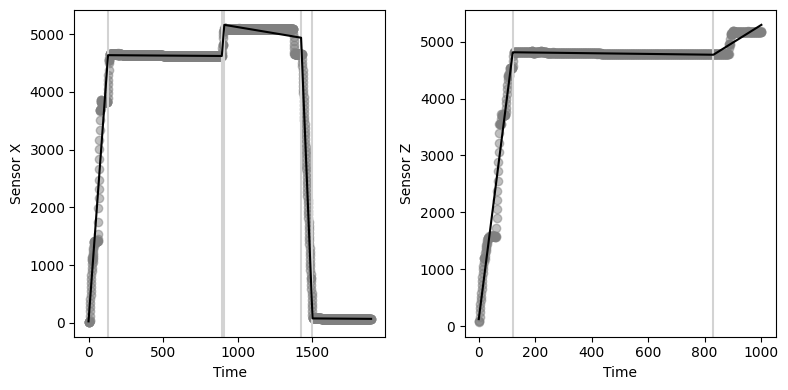

In [20]:
data = mistat.load_data('PROCESS_SEGMENT')

def sensorData(data, label):
    series = data[label]
    return pd.DataFrame({
        'Time': np.arange(len(series)),
        'values': series,
    })

sensorX = sensorData(data, 'X')
sensorZ = sensorData(data, 'Z')

def fitPiecewiseLinearFit(sensor, knots):
    model = pwlf.PiecewiseLinFit(sensor['Time'], sensor['values'], degree=1)
    model.fit(knots)
    return model

modelX = fitPiecewiseLinearFit(sensorX, 6)
modelZ = fitPiecewiseLinearFit(sensorZ, 3)

def plotPiecewiseLinearFit(sensor, model, ax, label):
    for bp in model.fit_breaks[1:-1]:
        ax.axvline(bp, color='lightgrey')
    ax.scatter(sensor['Time'], sensor['values'], color='grey', alpha=0.5)
    ax.plot(sensor['Time'], model.predict(sensor['Time']), color='black')
    ax.set_xlabel('Time')
    ax.set_ylabel(label)
    return ax
fig, axes = plt.subplots(ncols=2, figsize=(8,4))
plotPiecewiseLinearFit(sensorX, modelX, axes[0], 'Sensor X')
plotPiecewiseLinearFit(sensorZ, modelZ, axes[1], 'Sensor Z')
plt.tight_layout()
plt.show()

In [21]:
def getResultTable(model):
    predictions = model.predict(model.fit_breaks).round(1)
    df = pd.DataFrame({
        'breaks': model.fit_breaks[:-1], 
        'slope': model.calc_slopes(),
        'prediction': [f'{p1}--{p2}' for p1, p2 in zip(predictions[:-1], predictions[1:])]
    })
    borders = list(df['breaks'].round(1))
    left = borders[1:]
    right = borders[2:]
    Range = [f'${l} \\leq\mathrm{{Time}}< {r}$' for l, r in zip(left, right)]
    Range.insert(0, f'$\\mathrm{{Time}}< {right[0]}$')
    Range.append(f'${left[-1]} \\leq \\mathrm{{Time}}$')
    df.insert(0, 'Range', Range)
    df.index = [f'Segment {idx + 1}' for idx in df.index]
    df = df.drop(columns='breaks')
    return df
df = getResultTable(modelX)

In [22]:
df['Range'] = [s.replace('$', '').replace('\leq', '<=').replace('\mathrm{Time}', ' Time ') for s in df['Range']]
df

,Range,slope,prediction
Segment 1,Time < 894.3,35.296822,26.3--4634.1
Segment 2,130.5 <= Time < 894.3,-0.018757,4634.1--4619.8
Segment 3,894.3 <= Time < 910.7,32.888101,4619.8--5158.9
Segment 4,910.7 <= Time < 1426.3,-0.432024,5158.9--4936.1
Segment 5,1426.3 <= Time < 1502.6,-63.674995,4936.1--77.9
Segment 6,1502.6 <= Time,-0.020016,77.9--70.0


In [23]:
df = getResultTable(modelZ)

In [24]:
df['Range'] = [s.replace('$', '').replace('\leq', '<=').replace('\mathrm{Time}', ' Time ') for s in df['Range']]
df

,Range,slope,prediction
Segment 1,Time < 831.1,38.968274,125.2--4813.7
Segment 2,120.3 <= Time < 831.1,-0.061073,4813.7--4770.3
Segment 3,831.1 <= Time,3.090745,4770.3--5295.3
